PARÁBOLAS

In [154]:
# IMPORTS
import numpy as np
import math
from math import log
import matplotlib.pyplot as plt

LOGARITMO EN ESPEJO

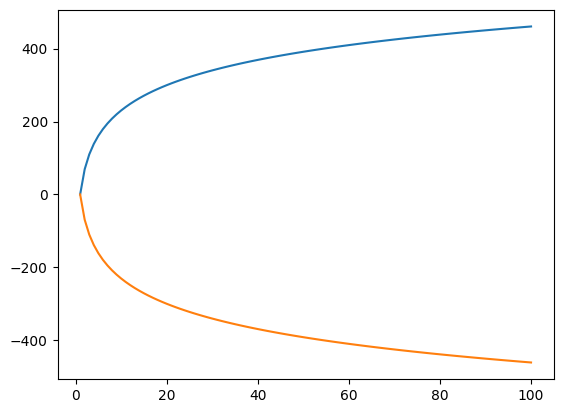

In [155]:
def print_log(pendiente=0.1):

    # rango a plotear
    x = np.linspace(1,100,100)

    # calculamos la imagen
    y = [ log(xi)*pendiente for xi in x ]

    # ploteamos
    plt.plot(x,y)
    plt.plot(x,-np.array(y))
    plt.show()

print_log(100)

PARÁBOLAS CUADRÁTICAS:

$ f(x) = ax² + bx + c $

In [156]:
def parabola_cuadratica(a, b, c, rango=10):
    x = list(range(-rango,rango+1))
    y = [ a*(xx**2) + b*xx + c for xx in x]
    return x , y

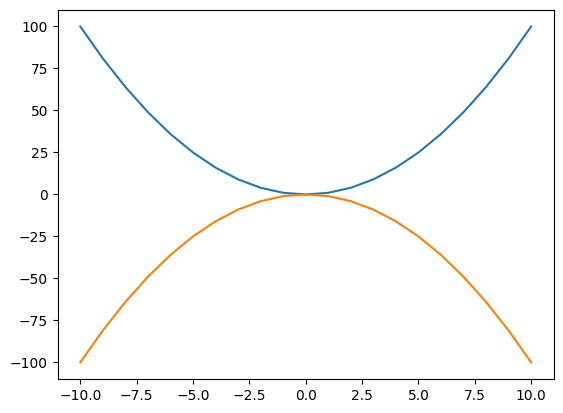

In [157]:
xp,yp = parabola_cuadratica(1, 0, 0)
plt.plot(xp, yp)
plt.plot(xp, -np.array(yp))
plt.show()

PARÁBOLAS N-ÉSIMAS - DADAS POR UN POLINOMIO DE ORDEN N para N > 2:

$  f(x) = a*x ^ {n-1} + b*x ^ {n-2} +.. + g $

In [158]:
def parabola_nesima(*kwargs):
    
    lista = list(kwargs)
    l, r = len(lista), 10
    x, y = list(range(-r,r+1)), []
    for xx in x:
        s = 0
        for i in range(l-1):
            s += lista[i]*(xx**(l-1-i))
        y.append(s+lista[-1])
    return x , y

In [159]:
px, py = parabola_nesima(1, 0, 1, 0)

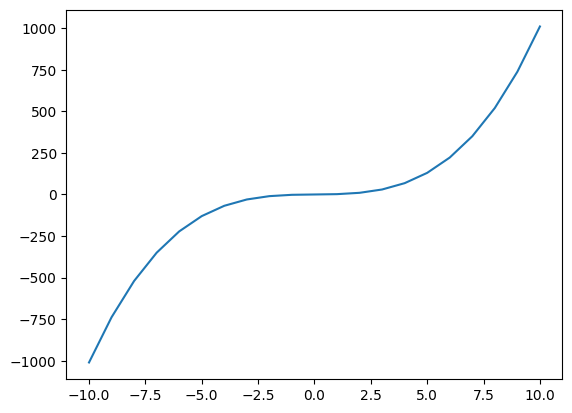

In [160]:
plt.plot(px, py)
plt.show()

MATRIZ DE ROTACIÓN con theta grados:



$
R(\theta) = \begin{pmatrix}
                cos(\theta) & -sen(\theta) \\
                sen(\theta) & cos(\theta)
             \end{pmatrix}
$



In [161]:
def R(theta,x,y):
    # rota el punto (x,y) en el eje cartesiano theta grados
    R = [[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]]
    xx, yy = [], []
    for i in range(len(x)):
        newx, newy = np.dot( [x[i], y[i]], R )
        xx.append(newx)
        yy.append(newy)
    return np.array(xx), np.array(yy)

In [162]:
angulo   = math.pi / 2     # 90º
xp = np.array(xp)
yp = np.array(yp)

In [163]:
# rotamos las parábolas obtenidas 90 grados
xxp, yyp = R(angulo,xp,yp)

SIMETRÍAS EN 2D

In [164]:
def plot_simetrias(x,y):
    for i in [-1,1]:
        for j in [-1,1]:
            plt.plot(i*x,j*y)

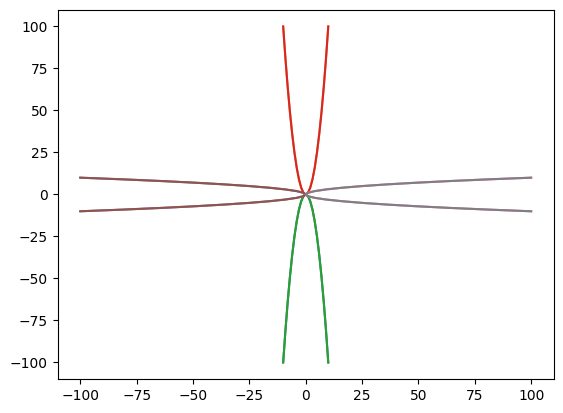

In [165]:
plot_simetrias(xp,yp)
plot_simetrias(xxp,yyp)
plt.show()

SERIE DE FIBONACCI:

$ f(n) = f(n-1) + f(n-2) $

In [166]:
def fib(n=100):
    l = [1,1]
    while l[-1] < n:
        l.append(sum(l[-2:]))
    return l

ESPIRAL DE FIBONACCI:

In [167]:
def fib_spiral(iters=10):
    f = fib()
    x = [ 1, 0, -1, 0 ] 
    y = [ 0, -1, 0, 1 ]
    rat, actual = f[0] , (0,0)
    px, py      = [], []
    for i in range(iters):
        px.append(actual[0])
        py.append(actual[1])
        actual = (actual[0] + rat*x[i%4], actual[1] + rat*y[i%4])
        rat    = f[i+1]
    return np.array(px), np.array(py)

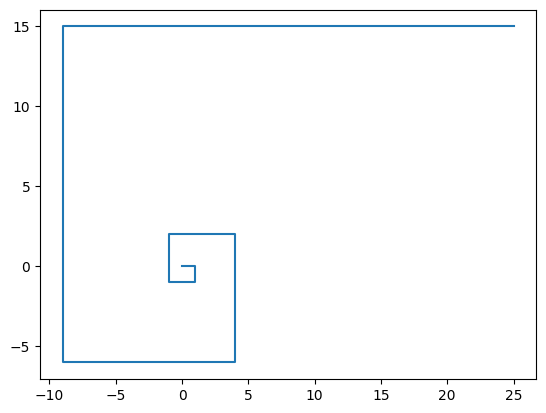

In [168]:
fib_x, fib_y  = fib_spiral()
plt.plot(fib_x,fib_y)
plt.show()

ECUACIÓN DE LA CIRCUNFERENCIA:


$
r² = (x-{x_0})²+ (y-{y_0})²
$

In [169]:
def ec_circunf(h1, h2, r):

    # ECUACIÓN DE LA CIRCUNFERENCIA: (x-h1)**2 + (y-h2)**2 = r**2 
    x = np.linspace(h1-r, h1+r, 100)
    y = [ math.sqrt( (r**2) - (xx-h1)**2 ) + h2 for xx in x ]
    
    return x, np.array(y)

FUNCION PARA CREAR UN ARCO ENTRE 2 PUNTOS

In [170]:
def hanging_line(a, b, radio):

    # DIBUJAR UNA CURVA ENTRE DOS PUNTOS

    # alineados en eje x - tienen la misma altura
    if a[1] == b[1]:
        c1 , c2      = (a[0]+b[0])/2 , a[1]
        pts_x, pts_y = ec_circunf(c1, c2, radio)
    # alineados en eje y - tienen la misma posición
    else:
        c1 , c2       = a[0] , (a[1]+b[1])/2
        pts_x , pts_y = ec_circunf(c1, c2, radio)
        
    return pts_x, pts_y

PENDIENTE CREAR CURVAS ENTRE LAS UNIONES DE LOS CAMBIOS DE CIRCUNFERENCIAS

In [171]:
# TODO

ESPIRAL ÁUREA

In [172]:
def golden_spiral(iters=10):
    x = [ 1, 0, -1, 0 ] 
    y = [ 0, -1, 0, 1 ]
    gold      = (1 + math.sqrt(5)) / 2 # phi, golden ratio
    rat, act  = 1 , (0,0)
    px, py    = []   , []
    for i in range(iters):
        px.append(act[0])
        py.append(act[1])
        act = (act[0] + rat*x[i%4], act[1] + rat*y[i%4])
        rat = gold * rat
    return np.array(px), np.array(py)

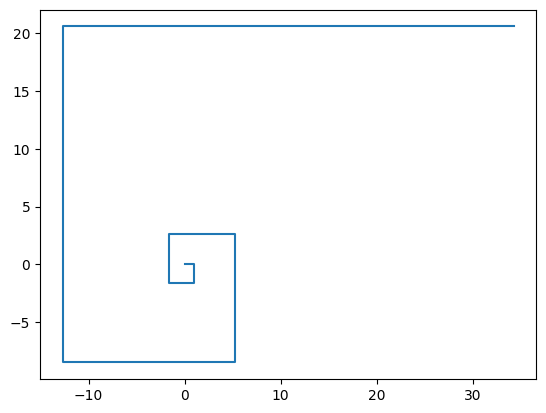

In [173]:
gold_x, gold_y = golden_spiral()
plt.plot(gold_x,gold_y)
plt.show()

COMPARACIÓN ESPIRAL DE FIBONACCI VS ESPIRAL ÁUREA:

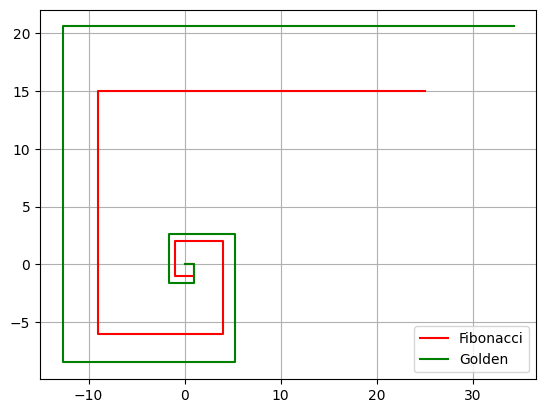

In [174]:
import matplotlib.pyplot as plt

fx,fy = fib_spiral()
gx,gy = golden_spiral()
plt.plot(fx,fy,'r', label='Fibonacci')
plt.plot(gx,gy,'g', label='Golden')
plt.legend()
plt.grid()
plt.show()
